# Моделирование распределений (scipy)

In [ ]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

Достаточно мощный и удобный инструмент — модуль <code>stat</code> библиотеки <code>scipy</code>. [Ссылка на документацию](https://docs.scipy.org/doc/scipy/reference/stats.html).

Рассмотрим некоторые возможности.

<b>Общий принцип:</b>

Пусть $X$ — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как **`X(params)`**. У него доступны следующие методы:


* `X(params).rvs(size=N)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`;
* `X(params).cdf(x)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction);
* `X(params).logcdf(x)` — значение логарифма функции распределения в точке $x$;
* `X(params).ppf(q)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction);
* `X(params).mean()` — математическое ожидание;
* `X(params).median()` — медиана ($1/2$-квантиль);
* `X(params).var()` — дисперсия (<b>Var</b>iance);
* `X(params).std()` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation).

Кроме того для непрерывных распределений определены функции
* `X(params).pdf(x)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction);
* `X(params).logpdf(x)` — значение логарифма плотности в точке $x$.

А для дискретных
* `X(params).pmf(k)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction);
* `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке $k$.

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`. Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`. При работе с распределениями и случайными величинами рекомендуем использовать первый способ, посколько он больше согласуется с математическим синтаксисом теории вероятностей.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального).

---

Например, распределение Бернулли

In [ ]:
sample = sps.bernoulli(p=0.2).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])

Первые 10 значений выборки:
 [0 1 0 0 0 0 0 1 1 0]


Или Биномиальное

In [ ]:
sample = sps.binom(p=0.2, n = 10).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])

Первые 10 значений выборки:
 [1 2 2 3 1 1 3 2 2 0]


Можно сразу составить, например, ФР

In [ ]:
sps.binom(p=0.2, n = 10).cdf(range(-1,11))

array([0.        , 0.10737418, 0.37580964, 0.67779953, 0.87912612,
       0.9672065 , 0.99363062, 0.99913564, 0.99992207, 0.9999958 ,
       0.9999999 , 1.        ])

Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.
Для этого надо создать класс, который будет наследоваться от класса `rv_continuous` для непрерывных случайных величин и от класса `rv_discrete` для дискретных случайных величин.
<a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous">Пример из документации.</a>

  Случайная величина $\xi$ может принимать значения с ненулевой вероятностью только на отрезке $\left[0, \frac{\pi}{4}\right]$, при этом ее функция распределения на этом отрезке задается выражением $a \cdot \sin x$.

  Выберите такое значение $a$, чтобы функция распределения была непрерывна.

  Смотрим решение этой задачи ранее и учитываем, что нам дана ФР, а библиотека хочет функцию плотности.

In [ ]:
class custom_dist(sps.rv_continuous):
    def _pdf(self, x):
        return 2**0.5 * m.cos(x)
distr = custom_dist(a=0, b=m.pi/4, name='custom_distribution')
print("Выборка из 10 элементов: ", distr.rvs(size=10))

Выборка из 10 элементов:  [0.19357416 0.47784836 0.71982272 0.04153023 0.3243471  0.59331728
 0.08432109 0.59511355 0.77407881 0.48167422]


In [ ]:
# Некоторые значениея ФР
distr.cdf(np.linspace(0, m.pi/4, 10))

array([0.        , 0.12325683, 0.24557561, 0.3660254 , 0.48368953,
       0.59767248, 0.70710678, 0.81115958, 0.90903896, 1.        ])

Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [ ]:
some_distribution = sps.rv_discrete(
    name='some_distribution',
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=1000)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:',
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Первые 10 значений выборки:
 [1 1 1 3 1 2 1 3 1 2]
Выборочное среденее: 1.698
Частота значений по выборке: 0.59 0.122 0.288


<BarContainer object of 3 artists>

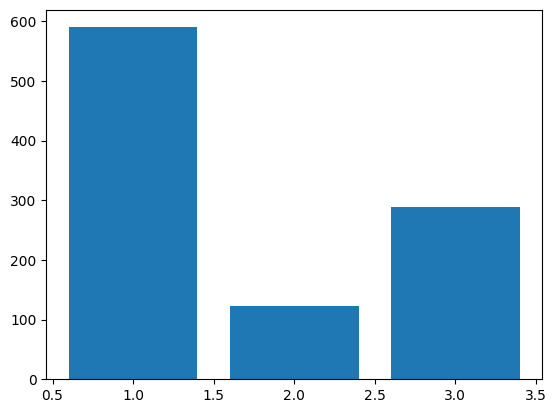

In [ ]:
res = Counter(sample)
plt.bar(res.keys(), res.values())

# Смеси распределений

## Пример смеси

Пусть дано распределение, задаваемое функцией распределения

$$
\mathsf{F}_{\xi}(x) = \begin{cases}0,&x\leq 0\\\frac{1}{2}x,&0<x \leq 1 \\ 1, &x>1\end{cases}
$$

Функция распределения будет выглядеть следующим образом:

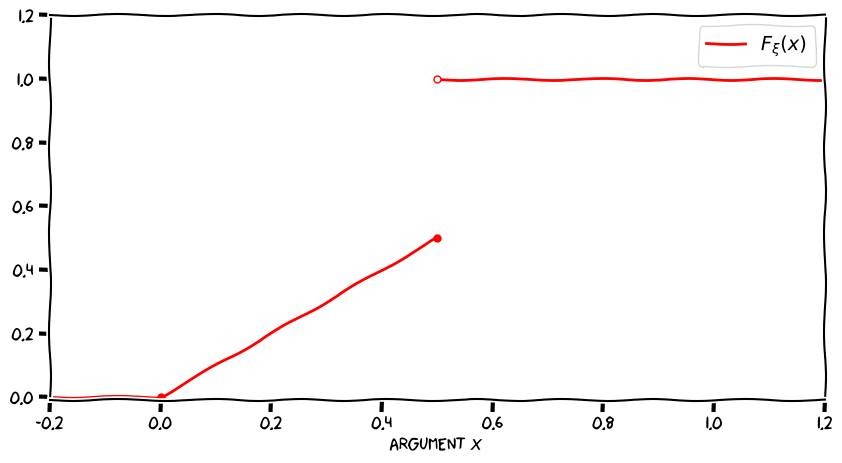

In [ ]:
# @title Построение графика
# !gdown -q 1rqfVzSU5dvIW41OI3G7IcgSztirHaSaC
# !unzip -q /content/fonts.zip
# import matplotlib.font_manager as fm
# fm.fontManager.addfont('/content/Comic Neue.ttf')
# fm.fontManager.addfont('/content/Humor Sans.ttf')
# fm.fontManager.addfont('/content/xkcd Script.ttf')
# fm.fontManager.addfont('/content/xkcd.ttf')
# fm.fontManager.addfont('/content/Comic Sans MS.ttf')
# !fc-cache -f -v

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit

plt.xkcd()

data = np.array([-0.2, 0, 0.5])
y = np.array([0, 0, 0.5])
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel(r'Argument $x$')
ax.set_facecolor('white')
ax.plot(data, y, color = 'red', zorder=1, label = r'$F_\xi(x)$')
ax.plot([0.5, 1.2], [1,1], color = 'red', zorder=1)

ax.scatter(data[1:], y[1:], color = 'red', s=25, zorder=2)
ax.scatter([0.5], [1], color='white', s=25, zorder=2, edgecolor = 'red')
ax.grid(False)
ax.set_xlim(data[0], 1.2)
ax.set_ylim([-0.01, 1.2])

ax.legend()
fig.savefig('Mixture.png', dpi=300, bbox_inches='tight')
plt.show()

Видно, что образуется скачок. Покажем, откуда он берется и как это понять.

Заметим, что $F_{\xi}(x)$ может быть представлена в виде

$$
F_{\xi}(x) = \frac{1}{2}F_{\text{АН}}(x) + \frac{1}{2}F_{\text{Д}}(x),
$$

где

$$
F_{\text{АН}}(x) = \begin{cases}0,&x\leq 0\\x,&0<x \leq 1 \\ 1, &x\geq1\end{cases},
$$
— равномерное распределение $\mathsf{U}_{0,1}$, а
$$
F_{\text{Д}}(x) = \begin{cases}0,&x\leq 1\\ 1, &x>1\end{cases}
$$
— вырожденное.

То есть не что иное, как разложение Лебега.

Существует и еще один способ понять, что мы имеем дело со смесью распределений. Попробуем построить функцию плотности $f_{\xi}(x) = F^{\prime}_{\xi}(x)$. То есть

$$
F^{\prime}_{\xi}(x) = \begin{cases}0,&x \notin [0,1]\\ \frac{1}{2}, &x \in [0,1]\end{cases}.
$$

Очевидно, что полученная функция не является плотностью (площадь подграфика не равна 1). Плотность будет получаться в случае умножения на 2. Таким образом перед нами смесь распределений.

## Задержки самолетов

Рассмотрим фрагмент датасета о задержках самолетов ([ссылка на источник](https://www.kaggle.com/datasets/giovamata/airlinedelaycauses/data))

Интересные нам признаки:

**DepTime** — actual departure time

**CRSDepTime** — scheduled departure time

**ArrTime** — actual arrival time.

**CRSArrTime** — scheduled arrival time.

In [ ]:
!gdown 1KExMbLhIEz_7p71wcpxuTAnm23ynIQAv
!unzip /content/DelayedFlights.csv.zip

Downloading...
From (original): https://drive.google.com/uc?id=1KExMbLhIEz_7p71wcpxuTAnm23ynIQAv
From (redirected): https://drive.google.com/uc?id=1KExMbLhIEz_7p71wcpxuTAnm23ynIQAv&confirm=t&uuid=9848c8cd-0b35-4214-a1bd-81c637bed2d2
To: /content/DelayedFlights.csv.zip
100% 65.3M/65.3M [00:02<00:00, 22.8MB/s]
Archive:  /content/DelayedFlights.csv.zip
  inflating: DelayedFlights.csv      
  inflating: __MACOSX/._DelayedFlights.csv  


In [ ]:
import pandas as pd

df = pd.read_csv('/content/DelayedFlights.csv', index_col = 'Unnamed: 0')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Рассмотрим разницу между предполагаемым временем полета и фактическим (задержка).

In [ ]:
time_scheduled = df['CRSArrTime'] - df['CRSDepTime']
time_actual = df['ArrTime'] - df['DepTime']
delays = time_scheduled - time_actual

(array([8.30000e+01, 8.54600e+03, 0.00000e+00, 8.00000e+00, 1.49600e+03,
        1.85102e+06, 1.10000e+01, 4.10000e+01, 9.80000e+01, 6.83450e+04]),
 array([-3022., -2466., -1910., -1354.,  -798.,  -242.,   314.,   870.,
         1426.,  1982.,  2538.]),
 <BarContainer object of 10 artists>)

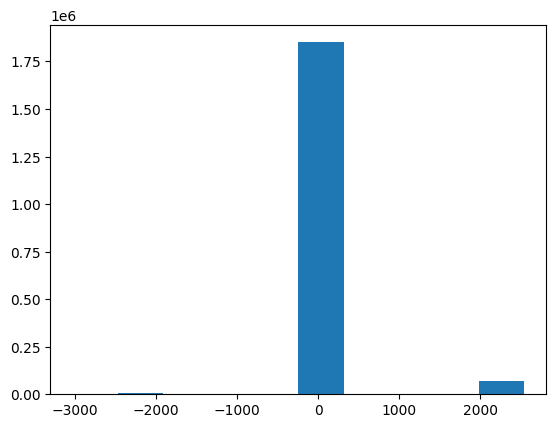

In [ ]:
plt.hist(delays, bins=10)

Видно, что задержки можно разделить на 2 типа: краткосрочные и долгосрочные. Рассмотрим более детальной каждый тип.

(array([2.00000e+01, 2.30000e+01, 2.40000e+01, 1.60000e+01, 3.80000e+01,
        5.00000e+01, 8.20000e+01, 8.90000e+01, 8.90000e+01, 1.36000e+02,
        2.29000e+02, 3.24000e+02, 3.86000e+02, 4.56000e+02, 8.14000e+02,
        1.41500e+03, 2.33300e+03, 3.16400e+03, 4.38400e+03, 7.58200e+03,
        1.84170e+04, 5.07160e+04, 1.48669e+05, 1.44002e+05, 3.20899e+05,
        7.37871e+05, 1.28248e+05, 2.30990e+05, 4.41940e+04, 4.26400e+03,
        2.15400e+03, 3.29000e+02, 3.90000e+01, 2.00000e+00, 2.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-499.  , -479.04, -459.08, -439.12, -419.16, -399.2 , -379.24,
        -359.28, -339.32, -319.36, -299.4 , -279.44, -259.48, -239.52,
        -219.56, -199.6 , -179.64, -159.68, -139.72, -119.76,  -99.8 ,
         -79.84,  -59.88,  -39.92,  -19.96,    0.  ,   

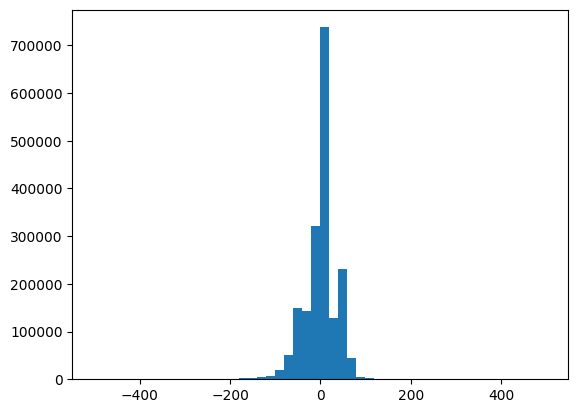

In [ ]:
plt.hist(delays[(delays < 500) & (delays > -500)], bins=50)

Видно, что мы имеем дело с кратковременными задержками и, наоборот, полетами, которые осуществились быстрее запланированного времени. Распределение похоже на нормальное (проверять соответствующую гипотезу не будем).

Рассмотрим второй пик на гистограмме. Видно, что тут распределены более длительные задержки по времени (распределение тоже похоже на нормальное).

Получается в реальных данных в рассматриваемом случае мы имеем дело со смесью двух распределений.

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 3.0000e+00, 6.0000e+00, 4.0000e+00,
        6.0000e+00, 9.0000e+00, 4.0000e+00, 7.0000e+00, 1.1000e+01,
        1.4000e+01, 1.2000e+01, 1.4000e+01, 2.0000e+01, 2.6000e+01,
        2.9000e+01, 3.7000e+01, 4.8000e+01, 6.9000e+01, 8.6000e+01,
        1.0600e+02, 1.1100e+02, 1.4700e+02, 1.9600e+02, 3.5900e+02,
        5.0500e+02, 5.6500e+02, 8.4400e+02, 1.3300e+03, 2.7090e+03,
        7.1860e+03, 1.0845e+04, 8.3190e+03, 2.2419e+04, 5.7030e+03,
        4.0620e+03, 2.2490e+03, 2.9700e+02, 5.1000e+01, 2.2000e+01]),
 array([1522.  , 1542.32, 1562.64, 1582.96, 1603.28, 1623.6 , 1643.92,
        1664.24, 1684.56, 1704.88, 1725.2 , 1745.52, 1765.84, 1786.16,
        1806.48, 1826.8 , 1847.12, 1867.44, 1887.76, 1908.08, 1928.4 ,
        1948.72, 1969.04, 1989.36, 2009.68, 2030.  , 2050.32, 2070.64,
        2090.96, 2111.28, 2131.6 ,

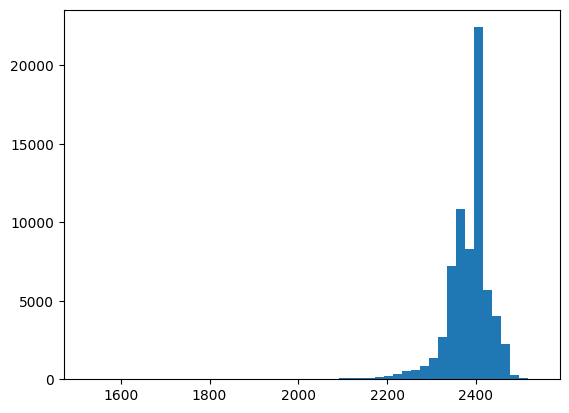

In [ ]:
plt.hist(delays[delays > 1500], bins=50)